## Linear regression

Generate a random data with underlying trend: $y = 4 + 3x$.
By convention, the y-intercept is taken to be the first parameter.

In [2]:
import numpy as np
X= 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

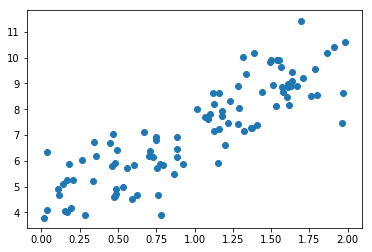

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

Our model is:  $y = c + mx = \theta^T X$ where $\theta = (c, m)$ and $X =  (1, x)$.

The given data is
$$ y_i = \theta^T X_i$$
for $i = 1, ..., M$.

We find the the optimum parameter $\hat{\theta}$ for which 
$$ MSE(\theta) = \frac1m \sum_{i=1}^{m} \left( \theta^T . X_i - y_i \right)^2$$
is minimized.

Observe that
$$
\begin{bmatrix}
\theta^T X_1 \\
\vdots \\
\theta^T X_M \\
 \end{bmatrix}
 -
\begin{bmatrix}
y_1\\
\vdots \\
y_M
 \end{bmatrix}
  = \bar{X}\theta - y.
 $$
 where
 $$ \bar{X} = 
 \begin{bmatrix}
 X_1\\
 \vdots\\
 X_M
 \end{bmatrix}
= 
 \begin{bmatrix}
 1 &x_1\\
 \vdots & \vdots\\
1 & x_m
 \end{bmatrix}.
 $$

So,
$$ M. \text{MSE}(\theta) = (\bar{X}\theta - y)^T(\bar{X}\theta - y) = (\bar{X}\theta)^T (\bar{X} \theta) - 2Y^T \bar{X}^T + Y^T Y $$

Using the fact that 
$$ \frac{d}{dX} X^TX = 2X$$
and 
$$ \frac{d}{dX} X^TB = B$$
we set  the derivative of MSE to zero to get
$$ 2 \bar{X}^T X \theta = 2 \bar{X}^T Y$$
which yields the normal equation
$$\hat{\theta} = \left(\bar{X}^T \bar{X} \right)^{-1} \bar{X}^T y$$

In [11]:
# Adding bias column of ones, the last column of \bar{X}
X_b = np.c_[np.ones((100,1)), X] # Note the double (( )) !!
# using numpy function linalg.inv
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.21473736],
       [2.92184349]])

Our expection was 4 and 3.

Now, we compute the prediction of the model, which is a line.

In [16]:
y_predict = np.c_[np.ones((100,1)), X].dot(theta_best)

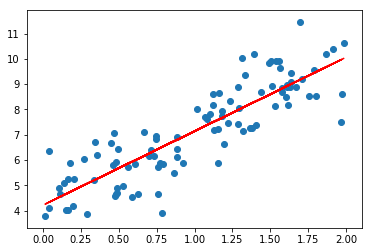

In [19]:
plt.scatter(X,y)
plt.plot(X, y_predict,'-r')

In `scikit-learn`, we can do the same using `LinearRegression`. We feed the x-values without the bias column and `lin_reg.intercept_` outputs the intercept.
While predicting, we need to take the dot product with x-value with a bias column (values of 1).

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The fitted parameters can be viewed using the variable with underscore in the end.

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21473736]), array([[2.92184349]]))

### Gradient descent
The **learning rate**  $\eta$ is the step size by which the gradient descent method jumps to the next iteration. 

The gradient descent algorithm is
$$ \theta^{n+1} = \theta^n - \eta \nabla_{\theta} \text{MSE}(\theta^n)$$
where
$$ \nabla_\theta \text{MSE}(\theta) = \frac2M  \bar{X}^T(\bar{X}\theta -Y)$$

The inital guess is chosen randomly. However, depending on the guess, might take a long time to reach the minimizer.

The **tolerance** is the lower bound of the gradient of MSE.

Here, `X_b`=$\bar{X}$.

In [25]:
eta = 0.1
n_iter = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iter):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta  - eta*gradient

theta

array([[4.21473736],
       [2.92184349]])

We can do a grid search to find the best learning rate that works. (Not sure how that will give us a different value of the minimizer, but I'm guessing it will be better for MSE's with multiple local minimizers.) 

For a convex cost function, (smooth enough), for a fixed learning rate, the convergenge rate is $O(\frac{1}{\#\ iterations})$.

### Stochastic gradient descent

Here, the elements of the gradient (a vectot) is computed using 
$$ \frac{\partial}{\partial\theta_j} \text{MSE}(\theta) = \frac2M \sum_{i=1}^m (\theta^T X_i - y_i) X_i(j)
$$
for each $j$. But for each $j$, a different sample is chosen. (?)
Choose the gradient of MSE from randomly chosen samples. However, we need to reduce the learning rate gradually to make sure randomly chosen gradients do not make the guess run out of the theorerical minimizer too much.

This method does not converge to the minimizer as step size goes to infinity, but it *does* converge in an average.
On the other hand, exploiting the randomness, it is very fast.

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(tol=0.2, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.2, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1739257]), array([2.98175911]))

### Mini Batch gradient descent
chooses a subset of the whole dataset to compute the gradient. This dataset is chosen at random so it has the best of both Stochastic and Batch gradient descent (where the gradient is computed from the whole dataset), fast and converges to the minimizer.

## Polynomial regression
Let the model be
$$ y = 0.5x^2 + x+ 2$$

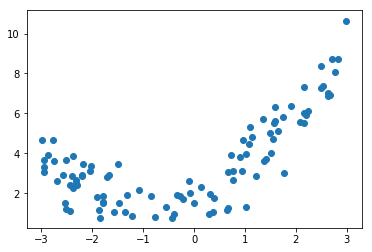

In [41]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.scatter(X,y)

Here, we create columns including all higher powers of $x$ upto the `degree` provided, with or without the bias term (i.e. the constant coefficent).

For example, after fitting the `PolynomialFeatures()`, the first column (with `include_bias=False`) is $x$, second column is $x^2$ etc.

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [47]:
X_poly[0]  # contains x and x^2

array([-1.90440638,  3.62676366])

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90809282]), array([[0.92145859, 0.52101024]]))

This implies that the model is $y = 1.9 + 0.92 x + 0.52 x^2$.

If $x=(a,b)$ is two-dimensionals, `PolynomialFeatures` with `degree=2` will produce $a, b, a2, b^2, ab$ columns. 
For degree $d$ with $n$ features, total polynomial features will be
$$ \frac{(n+d)!}{d! n!}$$ features.

### How to determine that the model is under or over fitting?
Look at the cross-validation scores. If the model fits a small amount of data *very* well (ie. interpolating), it would not work well with randomly selected data (overfitting).
